# Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tf.__version__

'2.5.0'

# Creating dataset

In [3]:
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
# X : x, y coordinates of points
# y : labels (0, 1)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

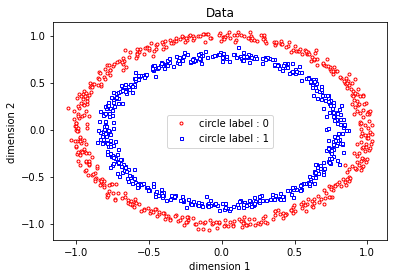

In [6]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro', markerfacecolor='w', markersize=3, label='circle label : 0')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', markerfacecolor='w', markersize=3, label='circle label : 1')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('Data')
plt.legend()
plt.show()

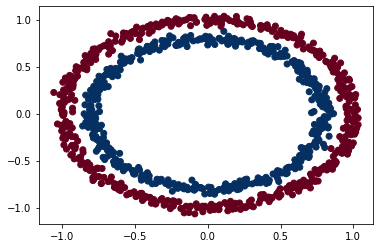

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.show()

# Input, output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

# Creating the model

In [9]:
tf.random.set_seed(42)

In [10]:
classifier = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(2),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ],
    name = "classifier"
)

In [11]:
classifier.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [12]:
history = classifier.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 4s 4ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

In [13]:
classifier.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

In [66]:
def visualize_predictions(model, X, y):

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    steps = 20

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, steps),
        np.linspace(y_min, y_max, steps)
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred_bound = model(x_in)
    y_pred = model(X)

    fig, ax = plt.subplots(2,1, figsize=(10,10))

    ax[0].plot(X[y == 0, 0], X[y == 0, 1], 'ro', markersize=3, label='circle label : 0')
    ax[0].plot(X[y == 1, 0], X[y == 1, 1], 'bs', markersize=3, label='circle label : 1')
    ax[0].set_xlabel('dimension 1')
    ax[0].set_ylabel('dimension 2')
    ax[0].set_title('Data')
    ax[0].legend()

    ax[1].plot(X[(y_pred <= 0.5)[:,0], 0], X[(y_pred <= 0.5)[:,0], 1], 'ro', markerfacecolor='r', markersize=3, label='circle label : 0')
    ax[1].plot(X[(y_pred >  0.5)[:,0], 0], X[(y_pred >  0.5)[:,0], 1], 'bs', markerfacecolor='b', markersize=3, label='circle label : 1')
    ax[1].plot(x_in[(y_pred_bound <= 0.5)[:,0], 0], x_in[(y_pred_bound <= 0.5)[:,0], 1], 'rs', markerfacecolor=[1, 0, 0, 0.2], markersize=5)
    ax[1].plot(x_in[(y_pred_bound >  0.5)[:,0], 0], x_in[(y_pred_bound >  0.5)[:,0], 1], 'bs', markerfacecolor=[0, 0, 1, 0.2], markersize=5)
    ax[1].set_xlabel('dimension 1')
    ax[1].set_ylabel('dimension 2')
    ax[1].set_title('Predictions data')
    ax[1].legend()
    plt.show()

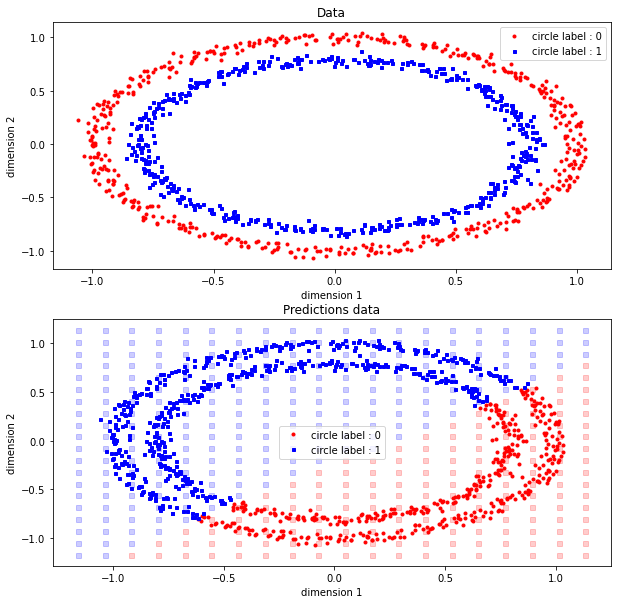

In [67]:
visualize_predictions(classifier, X, y)

In [73]:

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
    """
    
    steps = 100

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
                        np.linspace(y_min, y_max, steps))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


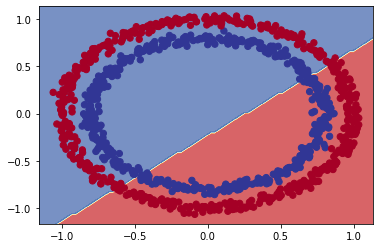

In [74]:
plot_decision_boundary(classifier, X, y)